<img src="https://i.imgur.com/36sp6u2.png" align="middle">

<img src="https://cdn.sstatic.net/Sites/stackoverflow/company/img/logos/so/so-logo.png" style="width:400px;height:80px;" align="middle">
<h1><font color="orange">Stackoverflow Survey 2017 Data Analysis</font></h1>

Goal 1:

The first goal is to identify the distribution of active software developers per country across the globe.

The respective gender representation within each will then be found to show how gender balanced, or imbalanced the programming environment may be at present.

From this information it is hoped that a further discernment of the most popular languages per country, and per gender can then be made.

It is intended that this resulting information may provide a potential basis for improvement of funding for the encouragement and recommendation of programming to less involved countries, and if a gender gap exists, stimulate a shift towards initiatives championing encouragement for a more overall balanced workplace.

Further, within existing or future programmers, results of this may entice a desire to learn a lesser known or lesser used language, or other languages of substantially less popularity to promote a balance of programmer multilinguality, or simply to focus funding into the most popular language and develop it to its full potential.

In [1]:
import numpy as np
import pandas as pd 
import plotly.plotly as py
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
import pycountry
import operator
from functools import reduce
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline 

dataSurvey = pd.read_csv('C:/Users/Thomas/Desktop/StackOverFlow/survey_results_public.csv')

<h1>The Distribution of Developers</h1>

Location is an important decision for any software developer to make. In this notebook we are going to examine the distribution of software developers across the globe, their gender, and what the most popular languages are in certain countries.

<h2>Expected Outcome</h2>

The distribution of developers is expected to be linked with the size of the population of a country, the larger it's population, the more respondants it will have.

Their is also expected to be a lot more male programmers than females.

<h2>Cleaning Up Data</h2>

Firstly lets first take a look at the number of unique answers to gender.

In [2]:
dataSurvey['Gender'].unique()

array(['Male', nan, 'Female', 'Gender non-conforming', 'Other',
       'Male; Gender non-conforming', 'Female; Transgender',
       'Male; Female', 'Male; Other', 'Transgender',
       'Transgender; Gender non-conforming',
       'Female; Gender non-conforming',
       'Male; Female; Transgender; Gender non-conforming; Other',
       'Male; Female; Transgender', 'Male; Female; Other',
       'Male; Female; Transgender; Gender non-conforming',
       'Male; Transgender', 'Female; Transgender; Gender non-conforming',
       'Gender non-conforming; Other',
       'Male; Female; Gender non-conforming', 'Female; Other',
       'Male; Transgender; Gender non-conforming', 'Transgender; Other',
       'Male; Gender non-conforming; Other',
       'Female; Gender non-conforming; Other',
       'Male; Female; Gender non-conforming; Other',
       'Female; Transgender; Other',
       'Female; Transgender; Gender non-conforming; Other',
       'Male; Transgender; Other', 'Male; Female; Transgender;

As you can see from the above list, developers are incredibly diverse. 

For this example, we are going to only count single answer respones such as Male, Female, Gender Non-Conforming, Other, and for Transgender we will group together both Male Transgender, and Female Trangender as one answer. 

Afterwards, we take in every country, along with its associated code, for mapping purposes.

In [3]:
mapping = {country.name: country.alpha3 for country in pycountry.countries}
mappingDataList = []

In [4]:
for country in mapping:        
    mappingData = {'Country': country, 'Code': mapping[country], 'Total': (dataSurvey.Country == country).sum(), 
                  'Male' : str(len(dataSurvey[(dataSurvey['Country']== country) & (dataSurvey['Gender']=='Male')])),
                  'Female': str(len(dataSurvey[(dataSurvey['Country']== country) & (dataSurvey['Gender']=='Female')])),
                  'Transgender': str(len(dataSurvey[(dataSurvey['Country']== country) & (dataSurvey['Gender'].str.contains('Transgender'))])),
                  'Gender non-conforming' : str(len(dataSurvey[(dataSurvey['Country'] == country) & (dataSurvey['Gender']=='Gender non-conforming')])),
                  'Other': str(len(dataSurvey[(dataSurvey['Country']== country) & (dataSurvey['Gender']=='Other')])),
                  'nan': str(len(dataSurvey[(dataSurvey['Country']== country) & (dataSurvey['Gender'].isnull())])),
                  }
    mappingDataList.append(mappingData)

dfMap = pd.DataFrame(mappingDataList) # creating panda object 

Then we want to add details to each country on a map.

In [5]:
dfMap['text'] = dfMap['Country'] + "<br>" + "Males : " + dfMap['Male']
dfMap['text'] = dfMap['text'] + "<br>" + "Females : " + dfMap['Female'] 
dfMap['text'] = dfMap['text'] + "<br>" + "Transgender : " + dfMap['Transgender'] 
dfMap['text'] = dfMap['text'] + "<br>" + "Gender non-conforming : " + dfMap['Gender non-conforming'] 
dfMap['text'] = dfMap['text'] + "<br>" + "Other : " + dfMap['Other'] 
dfMap['text'] = dfMap['text'] + "<br>" + "Nan : " + dfMap['nan'] 

Finally we map the data, utilising plotly.

In [6]:
data = [ dict(
        type = 'choropleth',
        locations = dfMap['Code'],
        z = dfMap['Total'],
        text = dfMap['text'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Respondents<br>Thousands'),
      ) ]

layout = dict(
    title = '2017 Stackoverflow Respondents',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'hammer'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False)

<h2>Conclusion</h2>

From this map we can extrapolate a great deal of information.

As somewhat expected, America has by far the greatest number of respondants, followed behind India, Germany, UK and Canada.

Suprisingly China, has only 239 respondants, even though it's population is in the billions. After some research, this can be attributed to the following things:

1: Stack Overflow originally being primarly targeted at english speakers. Here is a link from stack overflow themselves discussing the issue and how they intend to solve it by releasing stack overflow in different languages, such as portuguese, which might explain why Brazil has so much more respondants than China.
https://stackoverflow.blog/2014/02/13/cant-we-all-be-reasonable-and-speak-english/

2: Stack overflow being banned in China.

3: The existance of its counterpart, segmentation fault, a chinese clone of the site.

The number of males who respondant far outnumber everyone else, as was to be expected.

<h1>The Most Popular Languages Per Country</h1>

What languages are the most popular by country. 

<h2>Expected Outcome</h2>

It is expected for Java, C#, and C++ are the most well known languages.

<h3>Ireland</h3>

<h4>Preparing Data</h4>

Firstly we will create two lists, one for languages that have been worked with, and another for what they want to work with.

In [7]:
dataSurvey = dataSurvey[dataSurvey['WantWorkLanguage'].notnull()]
dataSurvey = dataSurvey[dataSurvey['HaveWorkedLanguage'].notnull()]

dataSurvey[dataSurvey['Country'] == 'Ireland']['WantWorkLanguage'].notnull()


#Get every language in a particular country where people what to work, not every language will be represented in every country.
WantWorkLanguage = map((lambda x: str(x).split('; ')), 
               dataSurvey[dataSurvey['Country'] == 'Ireland']['WantWorkLanguage'])

WantWorkLanguage = reduce((lambda x, y: x + y), WantWorkLanguage)

WantWorkLanguage = list(set(WantWorkLanguage))


#Get every language in a particular country where people have worked, not every language will be represented in every country.
HaveWorkedLanguage = map((lambda x: str(x).split('; ')), 
               dataSurvey[dataSurvey['Country'] == 'Ireland']['HaveWorkedLanguage'])

HaveWorkedLanguage = reduce((lambda x, y: x + y), HaveWorkedLanguage)

HaveWorkedLanguage = list(set(HaveWorkedLanguage))

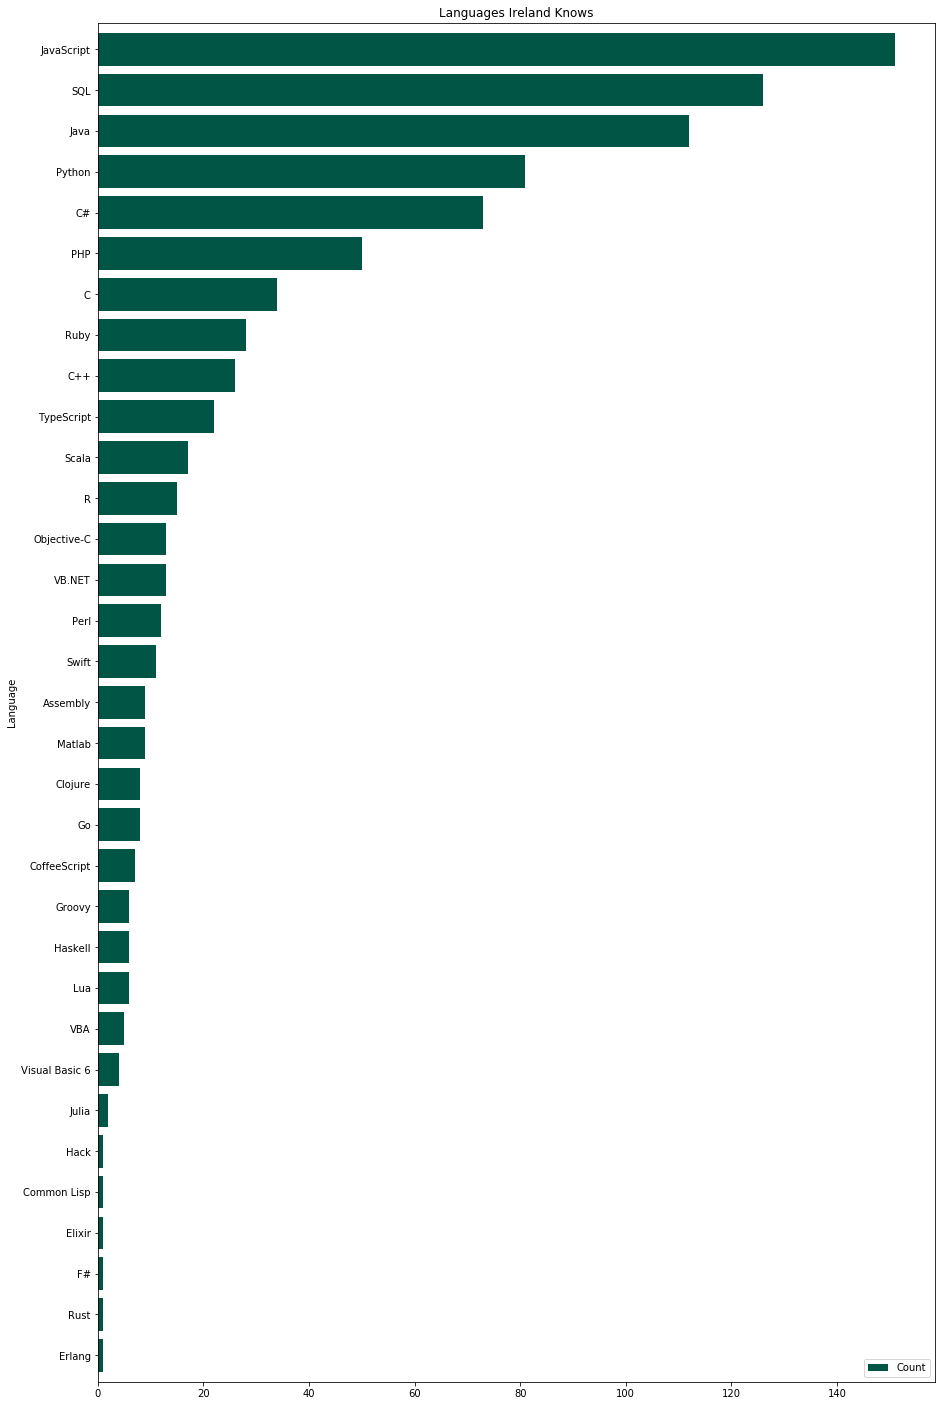

In [8]:
# Count the language users for selected country
HaveWorkedLanguageUser={}

for i in HaveWorkedLanguage:
    HaveWorkedLanguageUser[i] = dataSurvey[dataSurvey['Country'] == 'Ireland']['HaveWorkedLanguage'].apply(
        lambda x: i in str(x).split('; ')).value_counts()[1]

# Start plotting
HaveWorkedLang = pd.DataFrame(list(HaveWorkedLanguageUser.items()))
HaveWorkedLang.columns = [['Language', 'Count']]
HaveWorkedLang.set_index('Language', inplace=True)
HaveWorkedLang.sort_values('Count', inplace=True)
HaveWorkedLang.plot.barh(width=0.8, color='#005544', figsize=(15,25), title="Languages Ireland Knows")

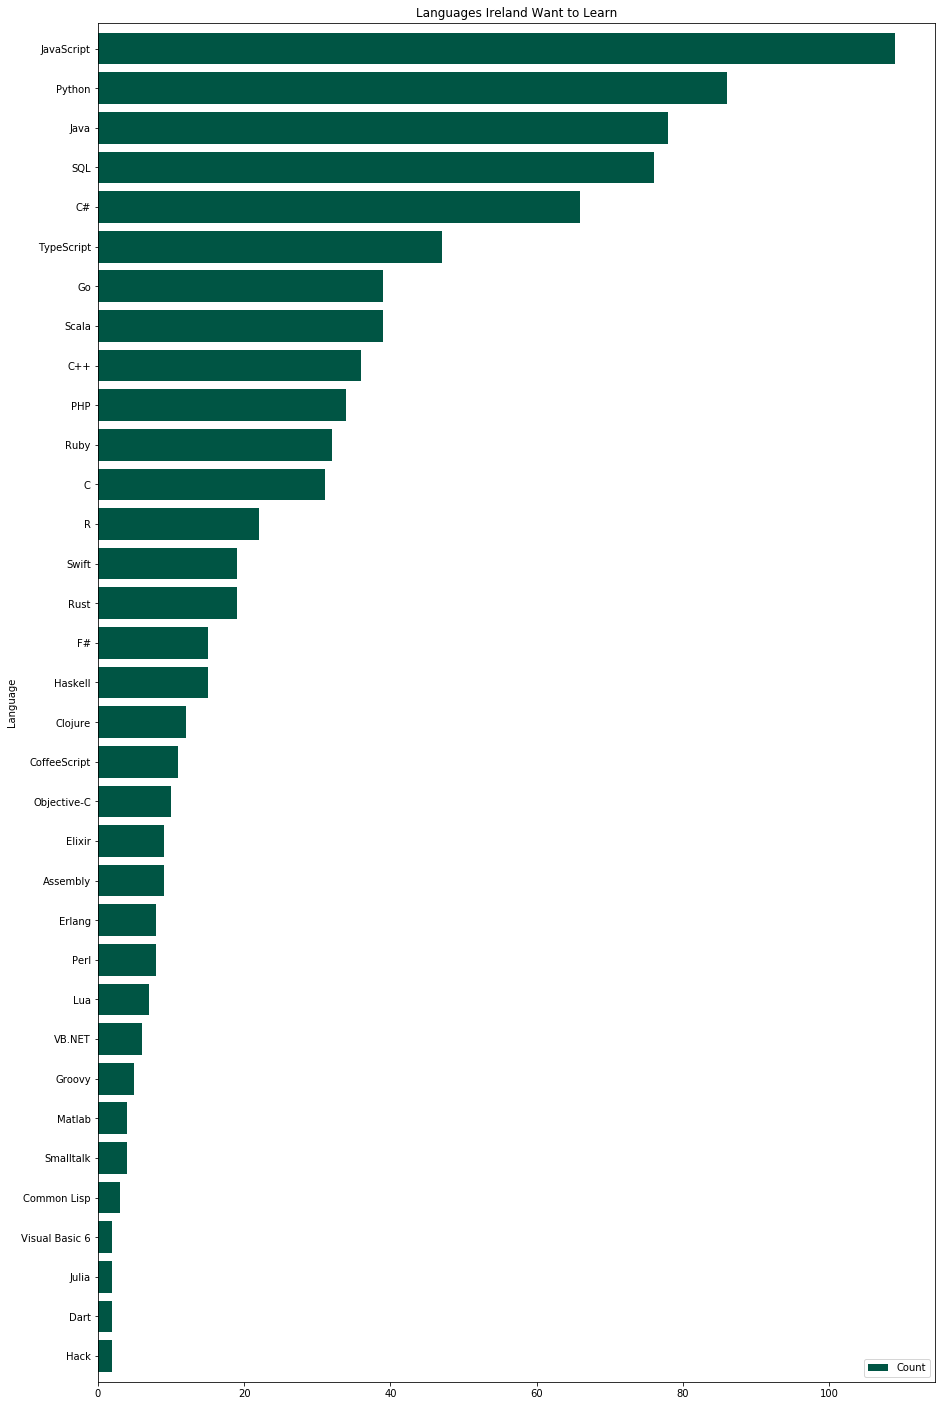

In [9]:
# Count the language users for selected country
WantWorkLanguageUser={}

for i in WantWorkLanguage:
    WantWorkLanguageUser[i] = dataSurvey[dataSurvey['Country'] == 'Ireland']['WantWorkLanguage'].apply(
        lambda x: i in str(x).split('; ')).value_counts()[1]

# Start plotting
WantWorkLang = pd.DataFrame(list(WantWorkLanguageUser.items()))
WantWorkLang.columns = [['Language', 'Count']]
WantWorkLang.set_index('Language', inplace=True)
WantWorkLang.sort_values('Count', inplace=True)
WantWorkLang.plot.barh(width=0.8, color='#005544', figsize=(15,25), title="Languages Ireland Want to Learn")

<h4>Conclusion</h4>

From the above two graphs it is eash to see that the most popular languages.

<h3>America</h3>

<h4>Preparing Data</h4>

Firstly we will create two lists, one for languages that have been worked with, and another for what they want to work with.

In [10]:
# Compile list of language found in survey
WantWorkLanguage = map((lambda x: str(x).split('; ')), 
               dataSurvey[dataSurvey['Country'] == 'United States']['WantWorkLanguage'])
# Flatten the list
WantWorkLanguage = reduce((lambda x, y: x + y), WantWorkLanguage)
# Remove duplication
WantWorkLanguage = list(set(WantWorkLanguage))


# Compile list of language found in survey
HaveWorkedLanguage = map((lambda x: str(x).split('; ')), 
               dataSurvey[dataSurvey['Country'] == 'United States']['HaveWorkedLanguage'])
# Flatten the list
HaveWorkedLanguage = reduce((lambda x, y: x + y), HaveWorkedLanguage)
# Remove duplication
HaveWorkedLanguage = list(set(HaveWorkedLanguage))

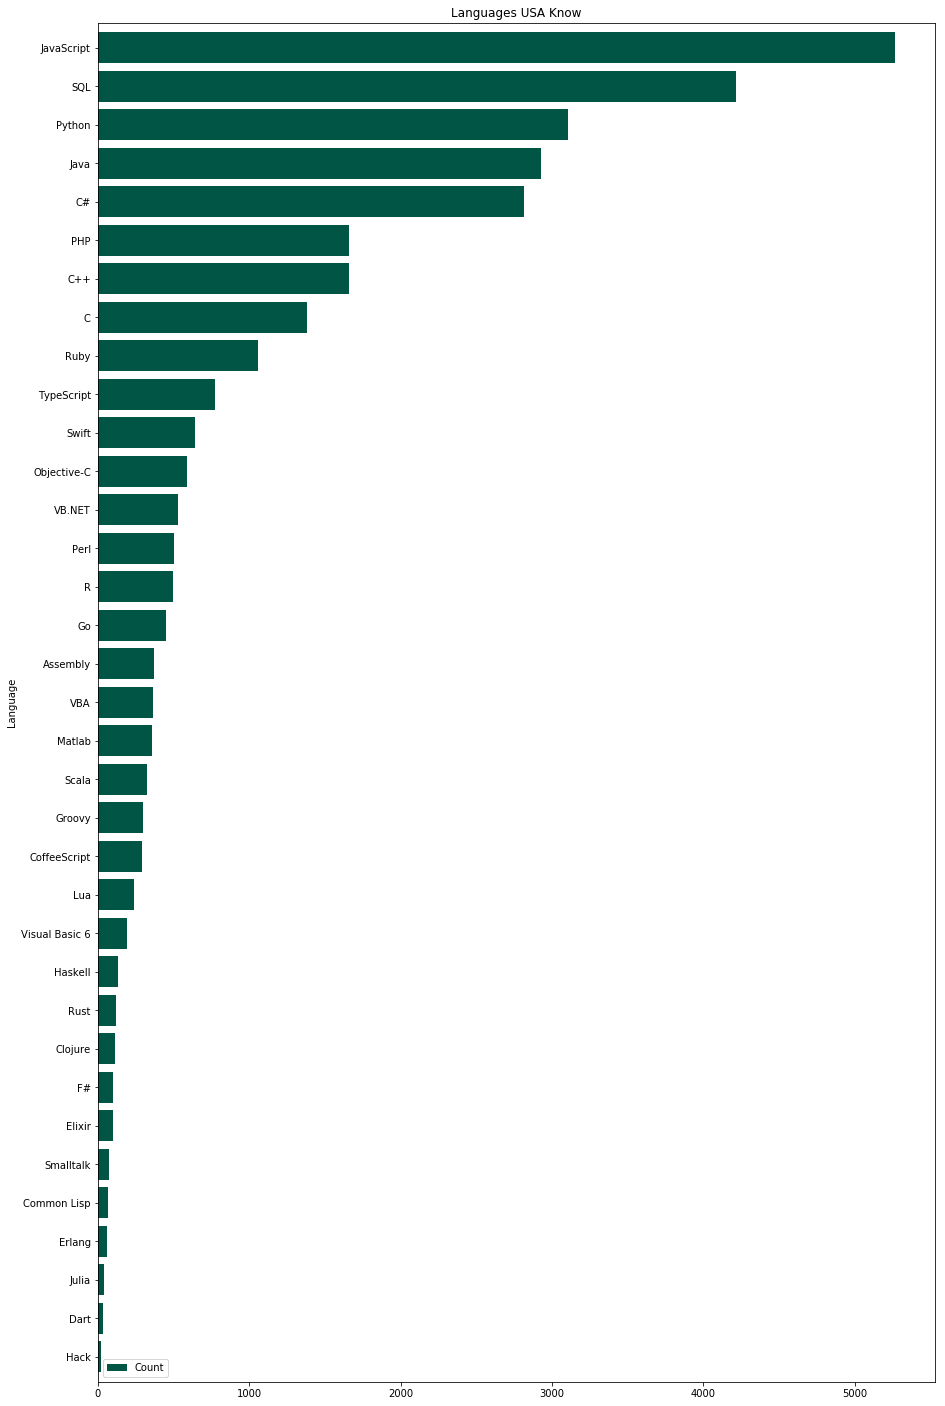

In [11]:
# Count the language users for selected country
HaveWorkedLanguageUser={}

for i in HaveWorkedLanguage:
    HaveWorkedLanguageUser[i] = dataSurvey[dataSurvey['Country'] == 'United States']['HaveWorkedLanguage'].apply(
        lambda x: i in str(x).split('; ')).value_counts()[1]

# Start plotting
HaveWorkedLang = pd.DataFrame(list(HaveWorkedLanguageUser.items()))
HaveWorkedLang.columns = [['Language', 'Count']]
HaveWorkedLang.set_index('Language', inplace=True)
HaveWorkedLang.sort_values('Count', inplace=True)
HaveWorkedLang.plot.barh(width=0.8, color='#005544', figsize=(15,25), title="Languages USA Know")

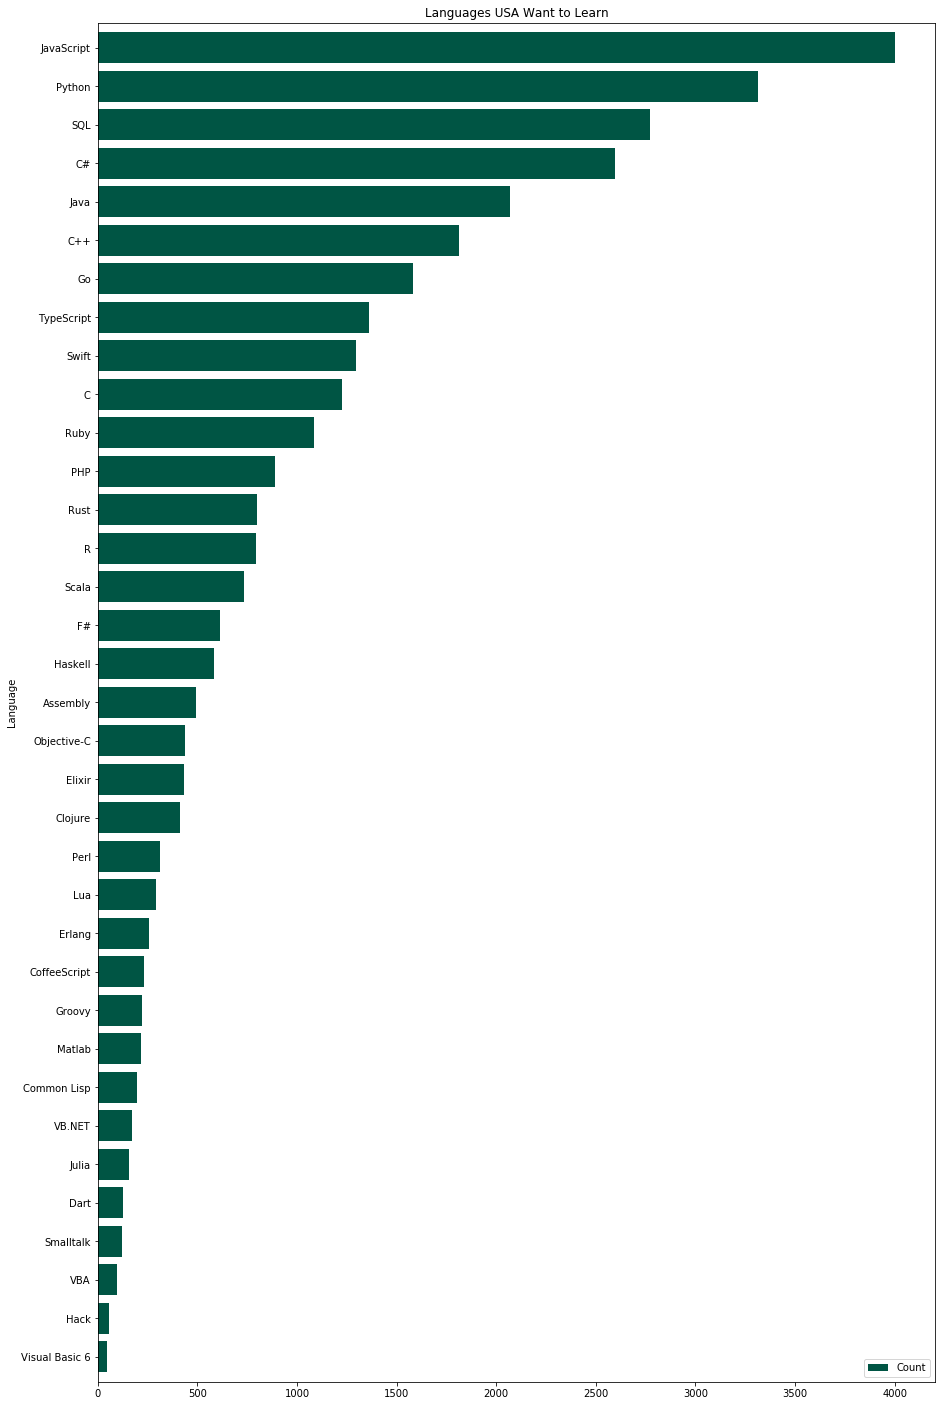

In [12]:
# Count the language users for selected country
WantWorkLanguageUser={}

for i in WantWorkLanguage:
    WantWorkLanguageUser[i] = dataSurvey[dataSurvey['Country'] == 'United States']['WantWorkLanguage'].apply(
        lambda x: i in str(x).split('; ')).value_counts()[1]

# Start plotting
WantWorkLang = pd.DataFrame(list(WantWorkLanguageUser.items()))
WantWorkLang.columns = [['Language', 'Count']]
WantWorkLang.set_index('Language', inplace=True)
WantWorkLang.sort_values('Count', inplace=True)
WantWorkLang.plot.barh(width=0.8, color='#005544', figsize=(15,25), title="Languages USA Want to Learn")

<h4>Conclusion</h4>

JavaScript is by far the most well known language in the world. This is due the popularity of web applications.

Right now if you are building anything for the web or more precisely anything that is rendered with the browser's engine, you pretty much need to have JavaScript in your technology stack.

<h2>Salary Based on Language</h2>

<h3>America</h3>

In [13]:
dataSurvey = dataSurvey[dataSurvey['Salary'].notnull()]
salary_avg_lang = dataSurvey[dataSurvey['HaveWorkedLanguage'].notnull()]
salary_avg_lang = salary_avg_lang[(salary_avg_lang['Country'] == 'United States')]

# Prepare developer type index to orgainze the salary
devDict = {}
for index, dev in enumerate(HaveWorkedLanguage):
    devDict[dev] = index

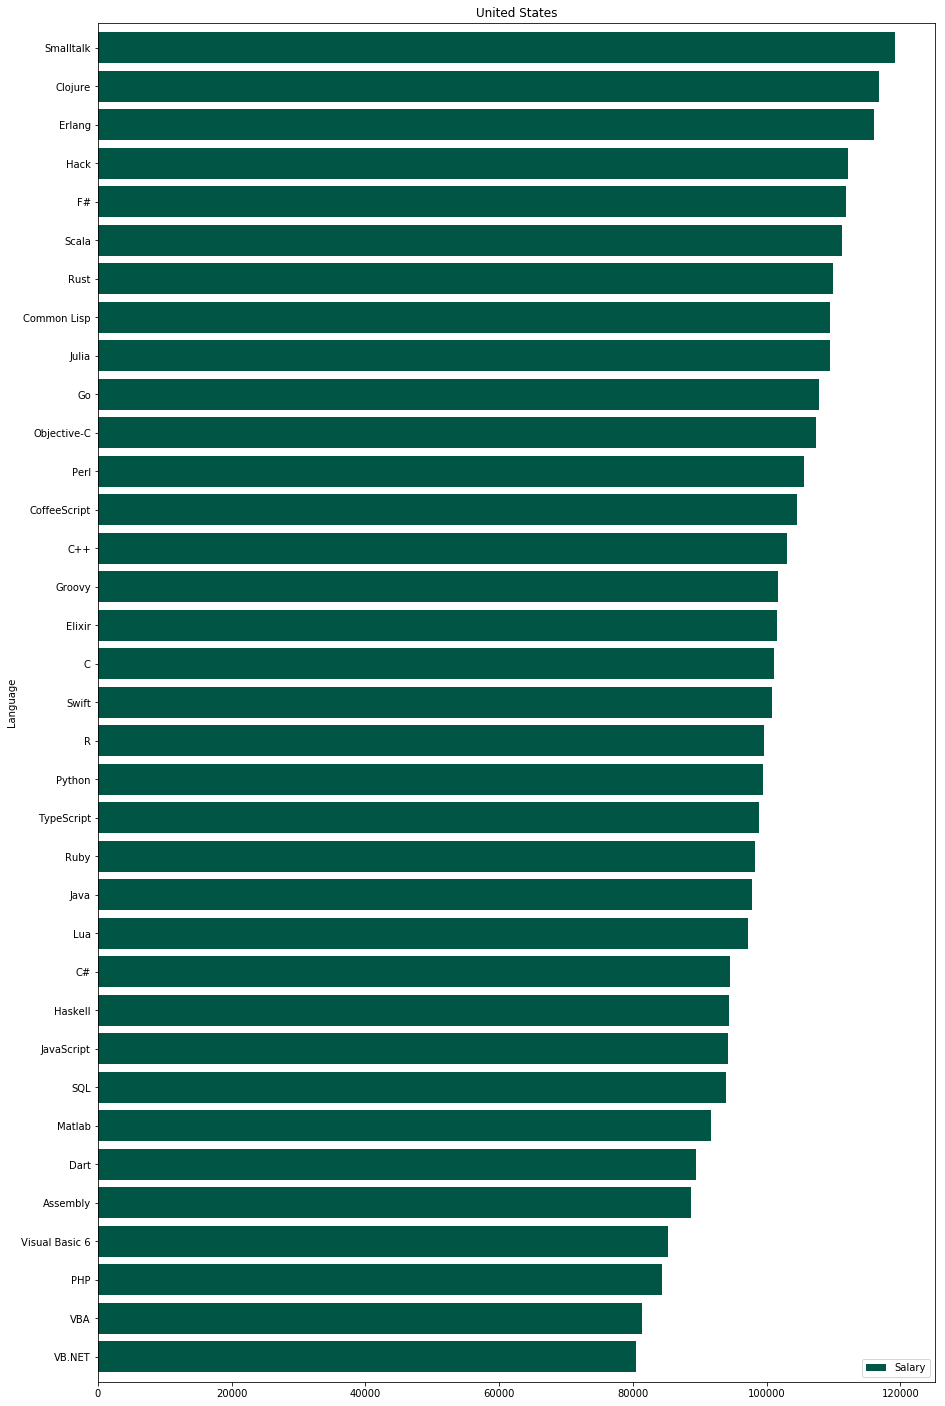

In [14]:
# Organize the salary based on its job type
devSalaries = [[] for i in range(len(HaveWorkedLanguage))]
for index, datum in salary_avg_lang.iterrows():
    devlist = datum['HaveWorkedLanguage'].split("; ")
    if not devlist:
        continue
    for d in devlist:
        devSalaries[devDict[d.strip()]].append(datum['Salary'])

# Calculate the average salary for each job type
Salaries = list(map(lambda x: np.mean(x), devSalaries))

# Construct the data frame
lang = pd.DataFrame()
lang["Language"] = HaveWorkedLanguage
lang["AverageSalary"] = Salaries
lang.columns = [['Language', 'Salary']]
lang.set_index('Language', inplace=True)
lang.sort_values('Salary', inplace=True)
lang.plot.barh(width=0.8, color='#005544', figsize=(15,25), title="United States")

Top 5 : Hack, Haskell, Clojure, Commen Lisp, F#

<h3>Ireland</h3>

In [15]:
# Compile list of language found in survey
HaveWorkedLanguage = map((lambda x: str(x).split('; ')), 
               dataSurvey[dataSurvey['Country'] == 'Ireland']['HaveWorkedLanguage'])
# Flatten the list
HaveWorkedLanguage = reduce((lambda x, y: x + y), HaveWorkedLanguage)
# Remove duplication
HaveWorkedLanguage = list(set(HaveWorkedLanguage))

In [16]:
dataSurvey = dataSurvey[dataSurvey['Salary'].notnull()]
salary_avg_lang = dataSurvey[dataSurvey['HaveWorkedLanguage'].notnull()]
salary_avg_lang = salary_avg_lang[(salary_avg_lang['Country'] == 'Ireland')]

# Prepare developer type index to orgainze the salary
devDict = {}
for index, dev in enumerate(HaveWorkedLanguage):
    devDict[dev] = index

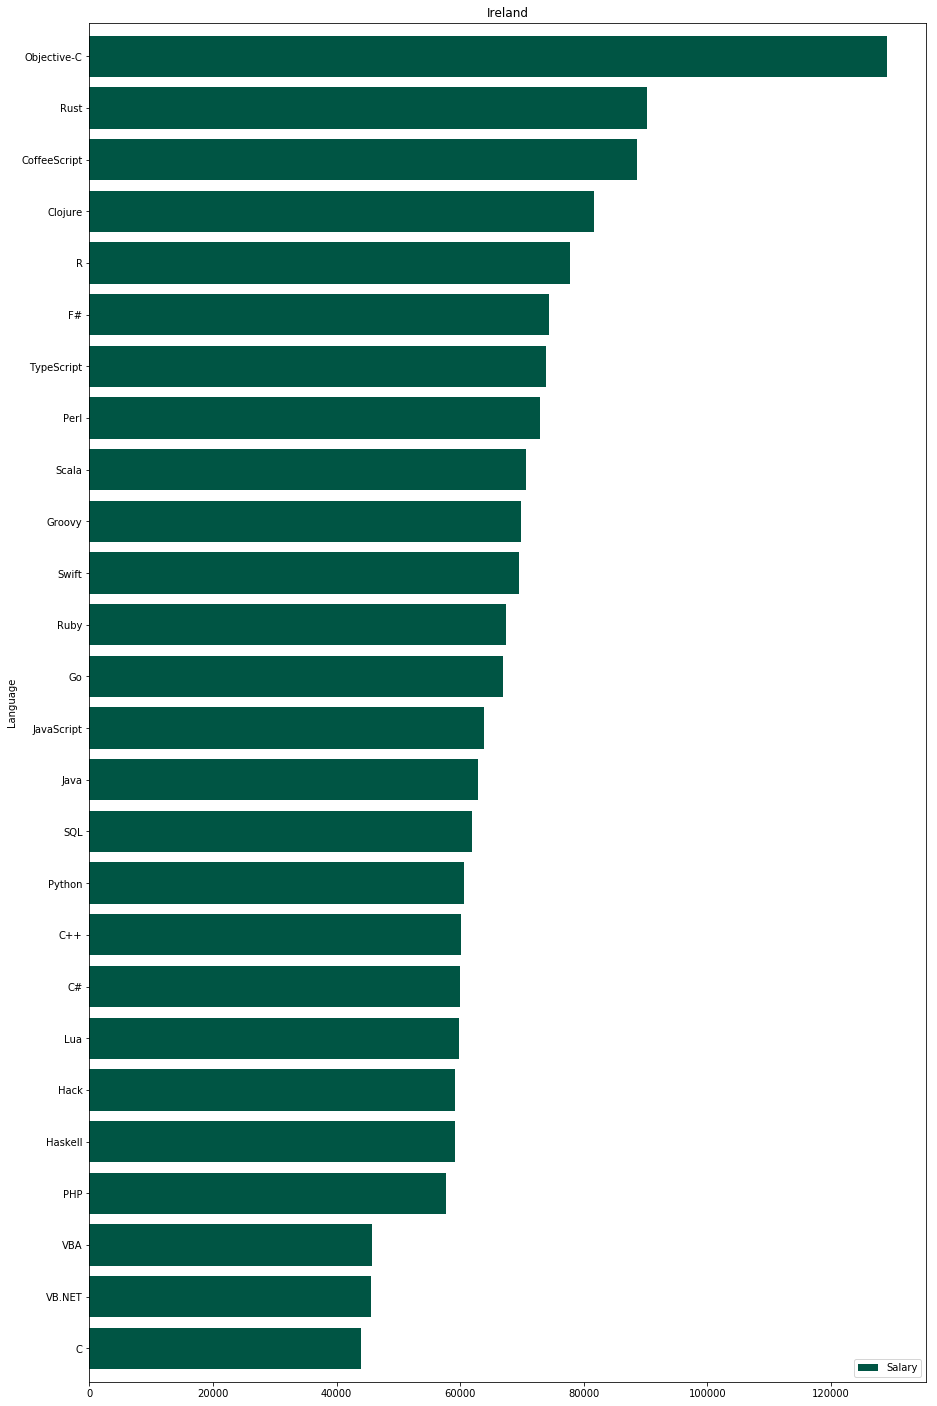

In [17]:
# Organize the salary based on its job type
devSalaries = [[] for i in range(len(HaveWorkedLanguage))]
for index, datum in salary_avg_lang.iterrows():
    devlist = datum['HaveWorkedLanguage'].split("; ")
    if not devlist:
        continue
    for d in devlist:
        devSalaries[devDict[d.strip()]].append(datum['Salary'])

# Calculate the average salary for each job type
Salaries = list(map(lambda x: np.mean(x), devSalaries))

# Construct the data frame
lang = pd.DataFrame()
lang["Language"] = HaveWorkedLanguage
lang["AverageSalary"] = Salaries
lang.columns = [['Language', 'Salary']]
lang.set_index('Language', inplace=True)
lang.sort_values('Salary', inplace=True)
lang.plot.barh(width=0.8, color='#005544', figsize=(15,25), title="Ireland")

Top 5 :  Objective C, Rust, CoffeeScript, Clojure, R

<h3>UK</h3>

In [18]:
# Compile list of language found in survey
HaveWorkedLanguage = map((lambda x: str(x).split('; ')), 
               dataSurvey[dataSurvey['Country'] == 'United Kingdom']['HaveWorkedLanguage'])
# Flatten the list
HaveWorkedLanguage = reduce((lambda x, y: x + y), HaveWorkedLanguage)
# Remove duplication
HaveWorkedLanguage = list(set(HaveWorkedLanguage))

In [19]:
dataSurvey = dataSurvey[dataSurvey['Salary'].notnull()]
salary_avg_lang = dataSurvey[dataSurvey['HaveWorkedLanguage'].notnull()]
salary_avg_lang = salary_avg_lang[(salary_avg_lang['Country'] == 'United Kingdom')]

# Prepare developer type index to orgainze the salary
devDict = {}
for index, dev in enumerate(HaveWorkedLanguage):
    devDict[dev] = index

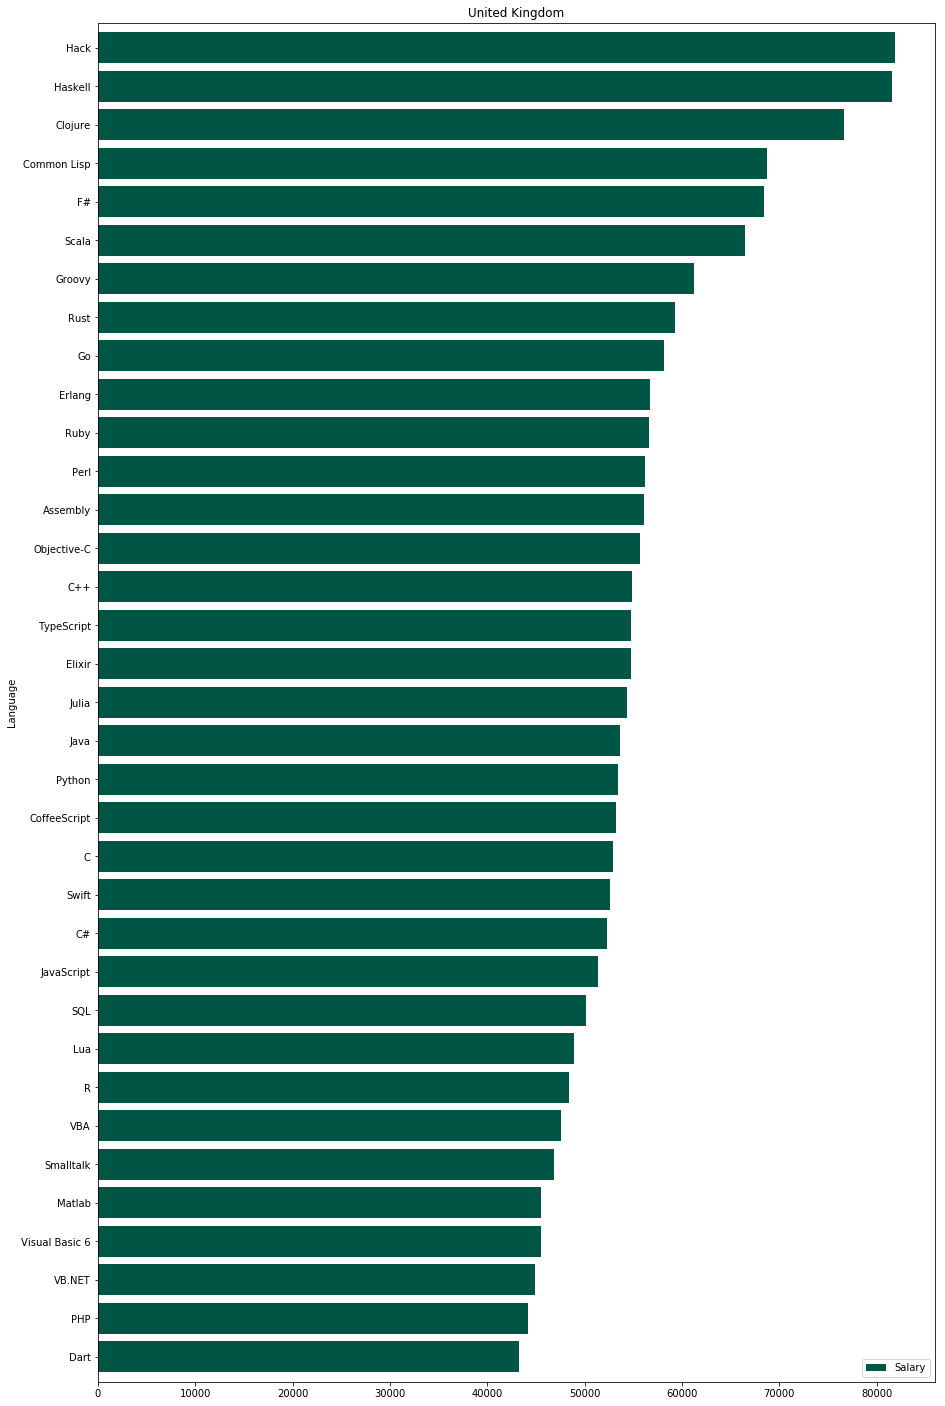

In [20]:
# Organize the salary based on its job type
devSalaries = [[] for i in range(len(HaveWorkedLanguage))]
for index, datum in salary_avg_lang.iterrows():
    devlist = datum['HaveWorkedLanguage'].split("; ")
    if not devlist:
        continue
    for d in devlist:
        devSalaries[devDict[d.strip()]].append(datum['Salary'])

# Calculate the average salary for each job type
Salaries = list(map(lambda x: np.mean(x), devSalaries))

# Construct the data frame
lang = pd.DataFrame()
lang["Language"] = HaveWorkedLanguage
lang["AverageSalary"] = Salaries
lang.columns = [['Language', 'Salary']]
lang.set_index('Language', inplace=True)
lang.sort_values('Salary', inplace=True)
lang.plot.barh(width=0.8, color='#005544', figsize=(15,25), title="United Kingdom")

Top 5 : Hack, Haskell, Clojure, Commen Lisp, F#

<h2>Salary Based on Gender</h2>

<h3>Worlwide</h3>
http://uk.businessinsider.com/16-countries-smallest-gender-equality-gap-2017-10/#16-canada-0769-this-country-is-in-1st-place-for-equality-in-educational-attainment-between-men-and-women-but-trails-in-56th-place-for-women-in-parliament-1

In [21]:
dataSurvey = pd.read_csv('C:/Users/Thomas/Desktop/StackOverFlow/survey_results_public.csv')
dataSurvey = dataSurvey[dataSurvey['Salary'].notnull()]
dataSurvey = dataSurvey.query('Salary>21')

dataSurvey[dataSurvey['Gender']=='Female']['Salary'].describe()

count       816.000000
mean      58297.468213
std       38517.015318
min          48.387097
25%       31250.000000
50%       52500.000000
75%       83062.500000
max      195000.000000
Name: Salary, dtype: float64

In [22]:
dataSurvey[dataSurvey['Gender']=='Male']['Salary'].describe()

count     10645.000000
mean      57108.925815
std       39681.260268
min          24.332798
25%       27500.000000
50%       50757.575758
75%       80000.000000
max      197000.000000
Name: Salary, dtype: float64

<h3>USA</h3>

In [23]:
dataSurveyAmerica = dataSurvey[dataSurvey['Country'] == 'United States']

In [24]:
dataSurveyAmerica[dataSurveyAmerica['Gender']=='Female']['Salary'].describe()

count       345.000000
mean      89602.362319
std       31827.332917
min          85.000000
25%       66114.000000
50%       85000.000000
75%      110000.000000
max      195000.000000
Name: Salary, dtype: float64

In [25]:
dataSurveyAmerica[dataSurveyAmerica['Gender']=='Male']['Salary'].describe()

count      3050.000000
mean      97106.566301
std       35134.218073
min          70.000000
25%       70066.000000
50%       95000.000000
75%      120000.000000
max      197000.000000
Name: Salary, dtype: float64

<h3>UK</h3>

In [26]:
dataSurveyUK = dataSurvey[dataSurvey['Country'] == 'United Kingdom']

In [27]:
dataSurveyUK[dataSurveyUK['Gender']=='Female']['Salary'].describe()

count        88.000000
mean      46574.914773
std       16267.121742
min       25000.000000
25%       35000.000000
50%       44375.000000
75%       52500.000000
max      125000.000000
Name: Salary, dtype: float64

In [28]:
dataSurveyUK[dataSurveyUK['Gender']=='Male']['Salary'].describe()

count      1160.000000
mean      53411.950758
std       23148.470638
min          31.250000
25%       37500.000000
50%       50000.000000
75%       62500.000000
max      193750.000000
Name: Salary, dtype: float64

<h3>Canada</h3>

In [29]:
dataSurveyCanada = dataSurvey[dataSurvey['Country'] == 'Canada']

In [30]:
dataSurveyCanada[dataSurveyCanada['Gender']=='Female']['Salary'].describe()

count        56.000000
mean      49483.658009
std       19191.907118
min          54.545455
25%       37878.787879
50%       49242.424242
75%       60606.060606
max      113636.363636
Name: Salary, dtype: float64

In [31]:
dataSurveyCanada[dataSurveyCanada['Gender']=='Male']['Salary'].describe()

count       547.000000
mean      58299.335217
std       21139.270802
min          79.545455
25%       43939.393939
50%       53030.303030
75%       68181.818182
max      151515.151515
Name: Salary, dtype: float64

<h3>Germany</h3>

In [32]:
dataSurveyGermany = dataSurvey[dataSurvey['Country'] == 'Germany']

In [33]:
dataSurveyGermany[dataSurveyGermany['Gender']=='Female']['Salary'].describe()

count       46.000000
mean     50019.167835
std      15330.698793
min       2150.537634
25%      43279.569892
50%      51612.903226
75%      59946.236559
max      76344.086022
Name: Salary, dtype: float64

In [34]:
dataSurveyGermany[dataSurveyGermany['Gender']=='Male']['Salary'].describe()

count       881.000000
mean      52135.825614
std       21641.303415
min          64.516129
25%       43010.752688
50%       53763.440860
75%       64516.129032
max      139784.946237
Name: Salary, dtype: float64

<h3>Ireland</h3>

In [35]:
dataSurveyIreland = dataSurvey[dataSurvey['Country'] == 'Ireland']

In [36]:
dataSurveyIreland[dataSurveyIreland['Gender']=='Female']['Salary'].describe()

count        4.000000
mean     32055.107527
std      22757.453536
min         48.387097
25%      25012.096774
50%      37741.935484
75%      44784.946237
max      52688.172043
Name: Salary, dtype: float64

In [37]:
dataSurveyIreland[dataSurveyIreland['Gender']=='Male']['Salary'].describe()

count        82.000000
mean      62537.208235
std       24045.650860
min       13978.494624
25%       47580.645161
50%       63440.860215
75%       77083.333333
max      129032.258065
Name: Salary, dtype: float64

<h2>Education Based on Gender</h2>

In [38]:
dataSurvey['FormalEducation'].unique()

array(["Bachelor's degree", 'Professional degree', "Master's degree",
       "Some college/university study without earning a bachelor's degree",
       'Doctoral degree', 'Secondary school',
       'I never completed any formal education',
       'Primary/elementary school', 'I prefer not to answer'], dtype=object)

In [39]:
orderOfImport = ['I prefer not to answer', 'I never completed any formal education', 
                'Primary/elementary school',
                 'Secondary school', "Some college/university study without earning a bachelor's degree", 
                 'Professional degree', "Bachelor's degree", "Master's degree", 
                    'Doctoral degree' ]

dataSurvey['FormalEducation'] = pd.Categorical(dataSurvey['FormalEducation'], categories=orderOfImport, ordered=True)

dataSurvey[dataSurvey['Gender']=='Female']['FormalEducation'].value_counts()


Bachelor's degree                                                    478
Master's degree                                                      199
Some college/university study without earning a bachelor's degree     71
Doctoral degree                                                       27
Secondary school                                                      24
Professional degree                                                   13
I prefer not to answer                                                 3
Primary/elementary school                                              1
I never completed any formal education                                 0
Name: FormalEducation, dtype: int64

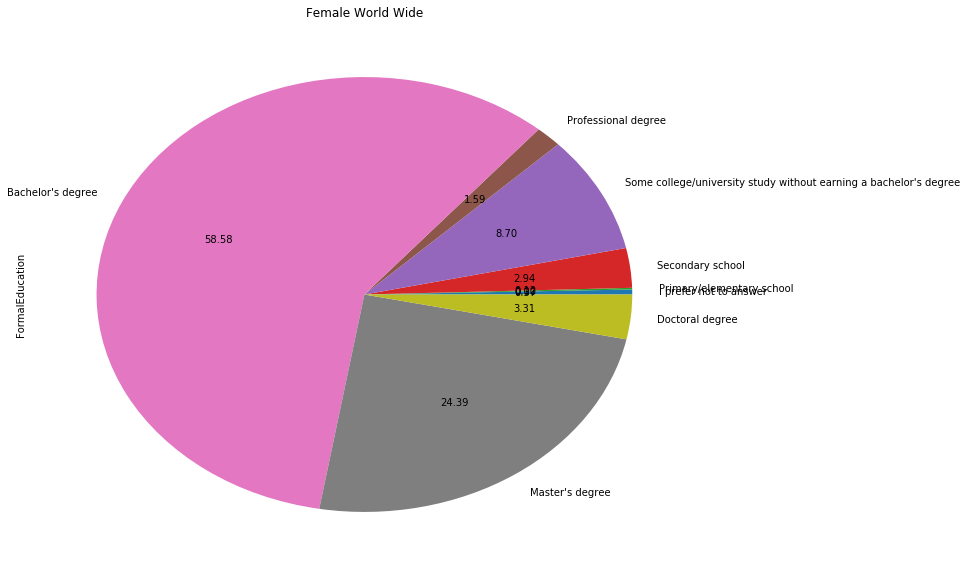

In [40]:
dataSurvey[dataSurvey['Gender']=='Female']['FormalEducation'].value_counts(sort=False).plot(kind='pie',figsize=(12,10), title="Female World Wide",autopct='%.2f')

In [41]:
dataSurvey[dataSurvey['Gender']=='Male']['FormalEducation'].value_counts()

Bachelor's degree                                                    5220
Master's degree                                                      2556
Some college/university study without earning a bachelor's degree    1741
Secondary school                                                      653
Doctoral degree                                                       240
Professional degree                                                   107
I never completed any formal education                                 49
Primary/elementary school                                              47
I prefer not to answer                                                 32
Name: FormalEducation, dtype: int64

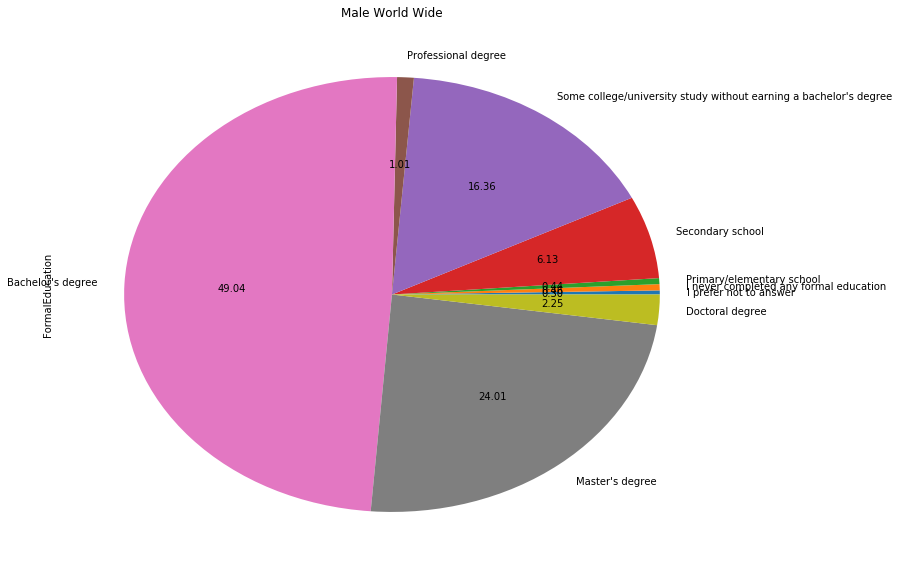

In [42]:
dataSurvey[dataSurvey['Gender']=='Male']['FormalEducation'].value_counts(sort=False).plot(kind='pie',figsize=(12,10), title="Male World Wide", autopct='%.2f')

<h2>Conclusion</h2>

Woman tend to be more highly educated than men. 

<h2>Years Programming</h2>

In [43]:
orderOfImport = ['Less than a year', '1 to 2 years','2 to 3 years', '3 to 4 years',  "4 to 5 years", "5 to 6 years", '6 to 7 years', '7 to 8 years', 
 "8 to 9 years", '9 to 10 years', '10 to 11 years', '11 to 12 years', '12 to 13 years', "13 to 14 years", "14 to 15 years", 
 '15 to 16 years', "16 to 17 years", '17 to 18 years', '18 to 19 years', '19 to 20 years', '20 or more years']
dataSurvey['YearsProgram'] = pd.Categorical(dataSurvey['YearsProgram'], categories=orderOfImport, ordered=True)

In [44]:
dataSurvey[dataSurvey['Gender']=='Female']['YearsProgram'].value_counts(sort=False)

Less than a year     11
1 to 2 years         39
2 to 3 years         40
3 to 4 years         66
4 to 5 years         70
5 to 6 years         71
6 to 7 years         38
7 to 8 years         40
8 to 9 years         41
9 to 10 years        59
10 to 11 years       48
11 to 12 years       25
12 to 13 years       31
13 to 14 years       13
14 to 15 years       28
15 to 16 years       23
16 to 17 years       17
17 to 18 years       22
18 to 19 years        9
19 to 20 years       19
20 or more years    104
Name: YearsProgram, dtype: int64

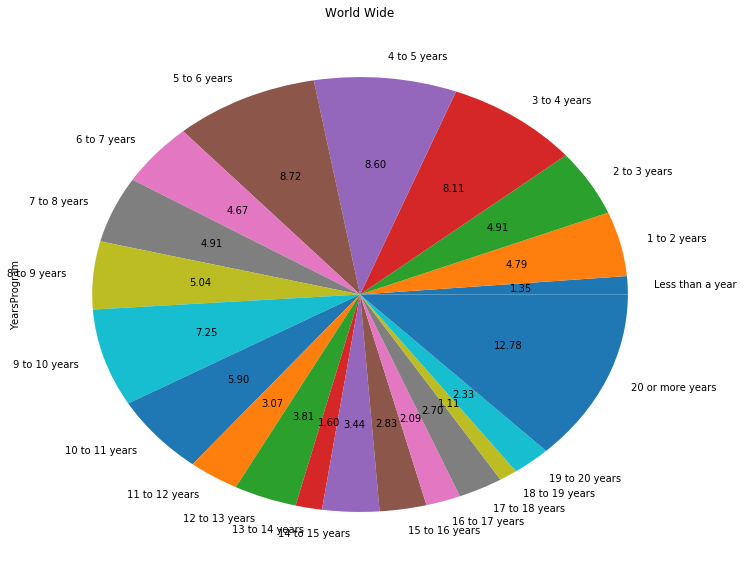

In [45]:
dataSurvey[dataSurvey['Gender']=='Female']['YearsProgram'].value_counts(sort=False).plot(kind='pie',figsize=(12,10), title="World Wide", autopct='%.2f')

In [46]:
dataSurvey[dataSurvey['Gender']=='Male']['YearsProgram'].value_counts(sort=False)

Less than a year      40
1 to 2 years         147
2 to 3 years         316
3 to 4 years         464
4 to 5 years         608
5 to 6 years         606
6 to 7 years         581
7 to 8 years         570
8 to 9 years         466
9 to 10 years        787
10 to 11 years       606
11 to 12 years       389
12 to 13 years       387
13 to 14 years       332
14 to 15 years       562
15 to 16 years       492
16 to 17 years       279
17 to 18 years       287
18 to 19 years       164
19 to 20 years       280
20 or more years    2276
Name: YearsProgram, dtype: int64

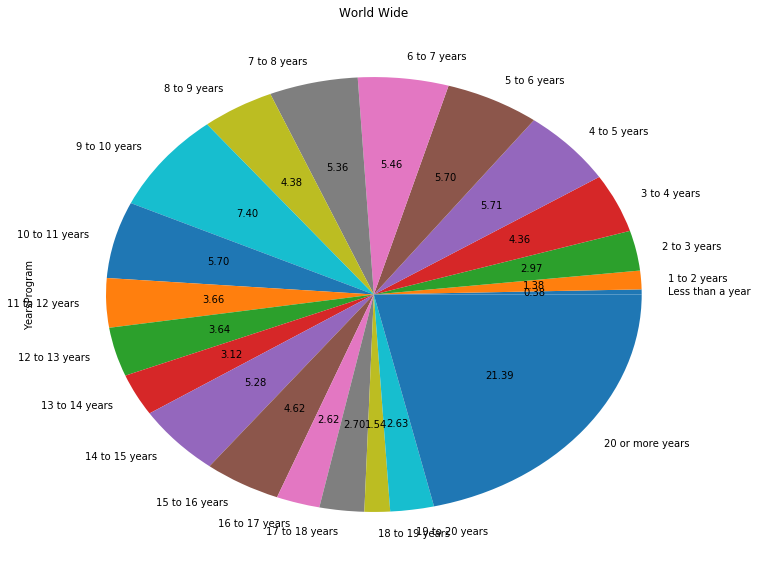

In [47]:
dataSurvey[dataSurvey['Gender']=='Male']['YearsProgram'].value_counts(sort=False).plot(kind='pie',figsize=(12,10), title="World Wide", autopct='%.2f')

<h3>Conclusion</h3>

Years programming isn't significantly different, not enough anyway to explain away the wage gap.

<h2>Linear Regression</h2>

In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

import matplotlib
 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import pandas as pd

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

%matplotlib inline 
dataSurvey = pd.read_csv('C:/Users/Thomas/Desktop/StackOverFlow/survey_results_public.csv' , encoding='utf8')

In [49]:
dataSurvey['Gender'].unique()

array(['Male', nan, 'Female', 'Gender non-conforming', 'Other',
       'Male; Gender non-conforming', 'Female; Transgender',
       'Male; Female', 'Male; Other', 'Transgender',
       'Transgender; Gender non-conforming',
       'Female; Gender non-conforming',
       'Male; Female; Transgender; Gender non-conforming; Other',
       'Male; Female; Transgender', 'Male; Female; Other',
       'Male; Female; Transgender; Gender non-conforming',
       'Male; Transgender', 'Female; Transgender; Gender non-conforming',
       'Gender non-conforming; Other',
       'Male; Female; Gender non-conforming', 'Female; Other',
       'Male; Transgender; Gender non-conforming', 'Transgender; Other',
       'Male; Gender non-conforming; Other',
       'Female; Gender non-conforming; Other',
       'Male; Female; Gender non-conforming; Other',
       'Female; Transgender; Other',
       'Female; Transgender; Gender non-conforming; Other',
       'Male; Transgender; Other', 'Male; Female; Transgender;

In [50]:
dataMale = dataSurvey.loc[(dataSurvey['Gender'] == 'Male')]
dataFemale = dataSurvey.loc[(dataSurvey['Gender'] == 'Female')]


dataMale = dataMale[dataMale['Salary'].notnull()]
dataMale = dataMale.query('Salary>21')

dataMale['Salary'].count()
dataMale = dataMale[dataMale['Salary'].notnull()]
#df = filtered_df[filtered_df['YearsProgram'] != 'I prefer not to answer']
dataMale = dataMale[dataMale['YearsProgram'].notnull()]
dataMale = dataMale[dataMale['Country'] == 'United States']

dataMale = dataMale[['YearsProgram','Salary']]

dataMale = dataMale.replace(['Less than a year', '1 to 2 years','2 to 3 years', '3 to 4 years',  "4 to 5 years", "5 to 6 years", '6 to 7 years', '7 to 8 years', 
 "8 to 9 years", '9 to 10 years', '10 to 11 years', '11 to 12 years', '12 to 13 years', "13 to 14 years", "14 to 15 years", 
 '15 to 16 years', "16 to 17 years", '17 to 18 years', '18 to 19 years', '19 to 20 years', '20 or more years'], 
                     [0, 1, 2, 3, 4, 5, 6, 7,8,9,10,11,12, 13, 14, 15, 16,17,18 , 19, 20])

dataFemale = dataFemale[dataFemale['Salary'].notnull()]
dataFemale = dataFemale.query('Salary>21')

dataFemale['Salary'].count()
dataFemale = dataFemale[dataFemale['Salary'].notnull()]
#df = filtered_df[filtered_df['YearsProgram'] != 'I prefer not to answer']
dataFemale = dataFemale[dataFemale['YearsProgram'].notnull()]
dataFemale = dataFemale[dataFemale['Country'] == 'United States']

dataFemale = dataFemale[['YearsProgram','Salary']]

dataFemale = dataFemale.replace(['Less than a year', '1 to 2 years','2 to 3 years', '3 to 4 years',  "4 to 5 years", "5 to 6 years", '6 to 7 years', '7 to 8 years', 
 "8 to 9 years", '9 to 10 years', '10 to 11 years', '11 to 12 years', '12 to 13 years', "13 to 14 years", "14 to 15 years", 
 '15 to 16 years', "16 to 17 years", '17 to 18 years', '18 to 19 years', '19 to 20 years', '20 or more years'], 
                     [0, 1, 2, 3, 4, 5, 6, 7,8,9,10,11,12, 13, 14, 15, 16,17,18 , 19, 20])

In [51]:
dataMale.count()

YearsProgram    3050
Salary          3050
dtype: int64

In [52]:

X = dataMale['YearsProgram']
Y = dataMale['Salary']

X=X.reshape(len(X),1)
Y=Y.reshape(len(Y),1)

X_train = X[-2643:]
X_test = X[2643:]

Y_train = Y[-2643:]
Y_test = Y[2643:]

C:\Users\Thomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead

C:\Users\Thomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



In [53]:
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

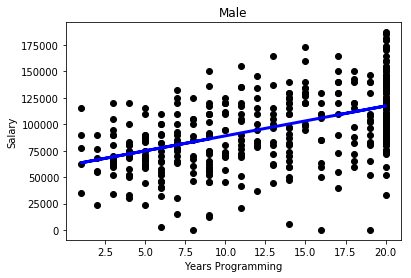

In [54]:
Y_pred = regr.predict(X_test)
# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)
plt.title('Male')
plt.xlabel('Years Programming')
plt.ylabel('Salary')
plt.show()

In [55]:
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
      # Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

error = np.mean(Y_pred != Y_test)
print(error)

Coefficients: 
 [[ 2826.60080211]]
Mean squared error: 956542467.87
Variance score: 0.25
1.0


In [56]:
dataFemale.count()

YearsProgram    345
Salary          345
dtype: int64

In [57]:
X = dataFemale['YearsProgram']
Y = dataFemale['Salary']

X=X.reshape(len(X),1)
Y=Y.reshape(len(Y),1)

X_train = X[-241:]
X_test = X[241:]

Y_train = Y[-241:]
Y_test = Y[241:]

C:\Users\Thomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead

C:\Users\Thomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



In [58]:
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

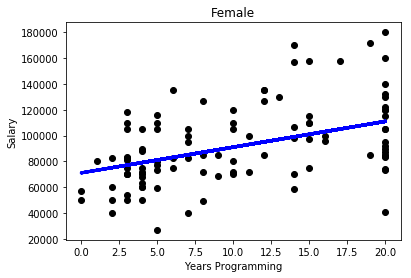

In [59]:
Y_pred = regr.predict(X_test)
# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)
plt.title('Female')
plt.xlabel('Years Programming')
plt.ylabel('Salary')
plt.show()

In [60]:
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
      # Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

error = np.mean(Y_pred != Y_test)
print(error)

Coefficients: 
 [[ 1993.1434494]]
Mean squared error: 746291310.04
Variance score: 0.23
1.0


<h2>Gender, Education & Salary</h2>

In [61]:
dataMale = dataSurvey.loc[(dataSurvey['Gender'] == 'Male')]
dataFemale = dataSurvey.loc[(dataSurvey['Gender'] == 'Female')]


dataMale = dataMale[dataMale['Salary'].notnull()]
dataMale = dataMale.query('Salary>21')

dataMale = dataMale[dataMale['Salary'].notnull()]
dataMale = dataMale[dataMale['FormalEducation'] != 'I prefer not to answer']
dataMale = dataMale[dataMale['Country'] == 'United States']

dataMale = dataMale[['FormalEducation','Salary']]

dataMale = dataMale.replace(['I never completed any formal education', 'Primary/elementary school', 'Secondary school', 
            "Some college/university study without earning a bachelor's degree",
            "Bachelor's degree", 'Professional degree', "Master's degree", 'Doctoral degree'], 
                     [0, 1, 2, 3, 4, 5, 6, 7]) 

dataFemale = dataFemale[dataFemale['Salary'].notnull()]
dataFemale = dataFemale.query('Salary>21')

dataFemale = dataFemale[dataFemale['Salary'].notnull()]
dataFemale = dataFemale[dataFemale['FormalEducation'] != 'I prefer not to answer']
dataFemale = dataFemale[dataFemale['Country'] == 'United States']

dataFemale = dataFemale[['FormalEducation','Salary']]

dataFemale = dataFemale.replace(['I never completed any formal education', 'Primary/elementary school', 'Secondary school', 
            "Some college/university study without earning a bachelor's degree",
            "Bachelor's degree", 'Professional degree', "Master's degree", 'Doctoral degree'], 
                     [0, 1, 2, 3, 4, 5, 6, 7]) 



In [62]:
dataMale.count()

FormalEducation    3048
Salary             3048
dtype: int64

In [63]:
X = dataMale['FormalEducation']
Y = dataMale['Salary']

X=X.reshape(len(X),1)
Y=Y.reshape(len(Y),1)

X_train = X[-2643:]
X_test = X[2643:]

Y_train = Y[-2643:]
Y_test = Y[2643:]

C:\Users\Thomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead

C:\Users\Thomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



In [64]:
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

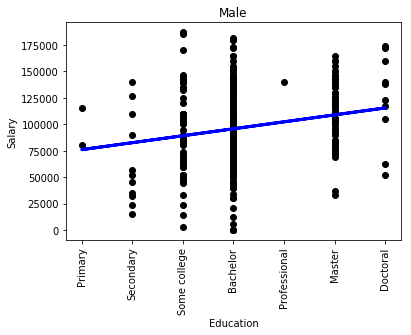

In [65]:
Y_pred = regr.predict(X_test)
# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)
x = np.array([1,2,3, 4, 5, 6, 7]) 
my_xticks = ['Primary','Secondary','Some college', 'Bachelor', 'Professional', 'Master', 'Doctoral']
plt.xticks(x, my_xticks)
plt.xticks(rotation=90)
plt.title('Male')
plt.xlabel('Education')
plt.ylabel('Salary')
plt.show()

In [66]:
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
      # Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

error = np.mean(Y_pred != Y_test)
print(error)

Coefficients: 
 [[ 6574.21135284]]
Mean squared error: 1214038312.74
Variance score: 0.05
1.0


In [67]:
X = dataFemale['FormalEducation']
Y = dataFemale['Salary']

X=X.reshape(len(X),1)
Y=Y.reshape(len(Y),1)

X_train = X[-241:]
X_test = X[241:]

Y_train = Y[-241:]
Y_test = Y[241:]

C:\Users\Thomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead

C:\Users\Thomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



In [68]:
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

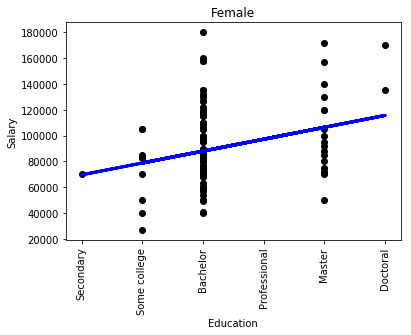

In [69]:
Y_pred = regr.predict(X_test)
# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)
x = np.array([2,3, 4, 5, 6, 7]) 
my_xticks = ['Secondary','Some college', 'Bachelor', 'Professional', 'Master', 'Doctoral']
plt.xticks(x, my_xticks)
plt.xticks(rotation=90)
plt.title('Female')
plt.xlabel('Education')
plt.ylabel('Salary')
plt.show()

Both male and females increase in salary due to education, though woman tend to start at the lower end and still don't make as much, even when as educated.'

In [70]:
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
      # Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

error = np.mean(Y_pred != Y_test)
print(error)

Coefficients: 
 [[ 9191.01112725]]
Mean squared error: 889548039.86
Variance score: 0.08
1.0
